In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glob
import seaborn as sns
from PIL import Image


img = Image.open('image017.jpg')
img = np.array(img)
height = img.shape[0]
width = img.shape[1]

print(height, width)

240 201


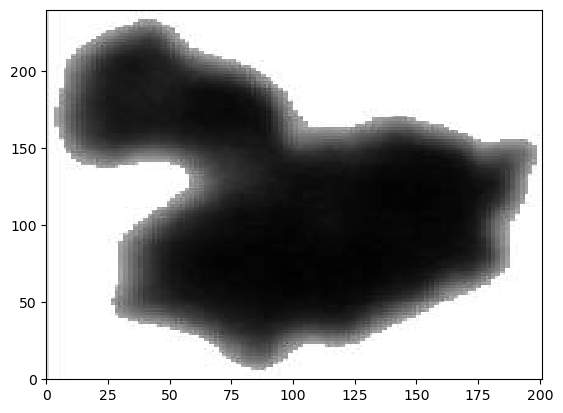

In [3]:
plt.pcolormesh(img[:,:], cmap='gray')

In [4]:
for n in range(0,img.shape[0]):
    for m in range(0,img.shape[1]):
        if img[n,m] > 173:
            img[n,m] = 0
        else:
            img[n,m] = 1

In [5]:
# Calculate the gradient of the image
gradient_x, gradient_y = np.gradient(img)

# Find the edge pixels
edge_pixels = np.sqrt(gradient_x**2 + gradient_y**2) > 0

# Print the edge pixels
print(edge_pixels)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [63]:
internal_pixels = np.where(img == 1)


(240, 201)

In [62]:
internal_pixels

(array([  6,   6,   6, ..., 233, 233, 233]),
 array([85, 86, 87, ..., 41, 42, 43]))

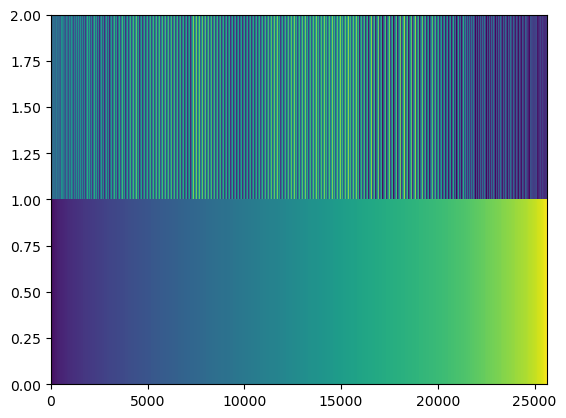

In [60]:
plt.pcolormesh(internal_pixels)

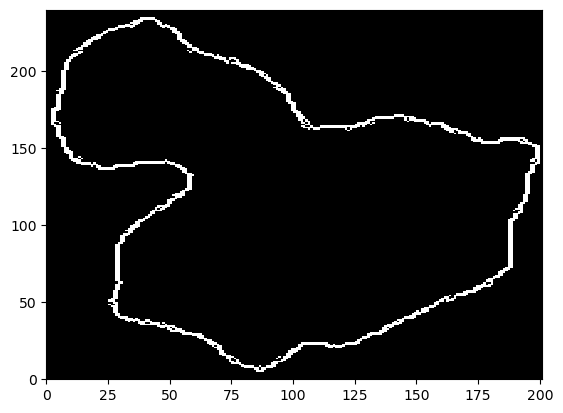

In [6]:
plt.pcolormesh(edge_pixels, cmap='gray')

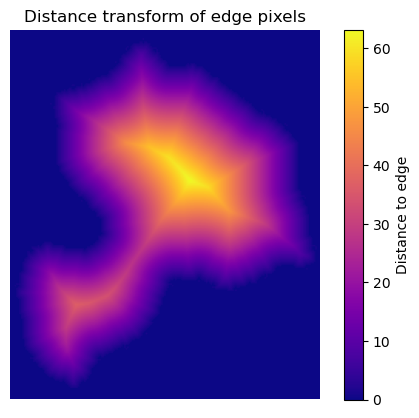

In [68]:
# Calculate the distance transform
dist_transform = distance_transform_edt(~edge_pixels)

# Assign negative distance for pixels outside the bounds of edge_pixels
for n in range(dist_transform.shape[0]):
    for m in range(dist_transform.shape[1]):
        if img[n, m]!=1:
            dist_transform[n, m] = 0

# Plot the distance transform
plt.imshow(dist_transform, cmap='plasma')
plt.colorbar(label='Distance to edge')
plt.title('Distance transform of edge pixels')
plt.axis('off')
# plt.clim(0, 10)
plt.show()


In [35]:
import numpy as np
from scipy.ndimage import label, maximum_position

# Label connected components in the distance_transform array
labels, num_labels = label(dist_transform)

# Find the maximum positions in each labeled region
maxima_positions = maximum_position(dist_transform, labels, np.arange(1, num_labels+1))

# Print the local maxima positions
print(maxima_positions)


[(239, 200), (6, 86), (98, 116), (13, 75), (21, 68), (32, 51), (33, 50), (33, 138), (36, 40), (37, 142), (61, 178), (110, 45), (111, 46), (141, 198), (143, 13), (154, 193), (155, 192), (162, 122), (164, 106), (166, 105), (167, 104), (168, 146), (189, 94), (197, 88), (230, 34)]


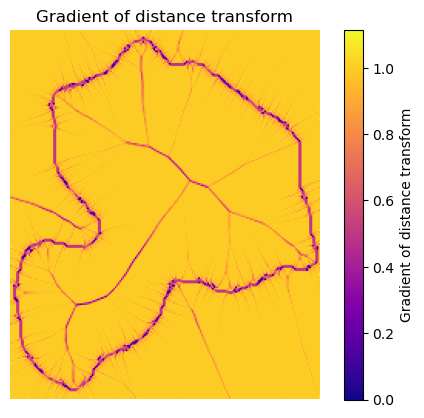

In [34]:
from scipy.ndimage import distance_transform_edt

# Calculate the distance transform
dist_transform = distance_transform_edt(~edge_pixels)

# Plot the distance transform
plt.imshow(np.linalg.norm(np.gradient(dist_transform), axis = 0), cmap='plasma')
plt.colorbar(label='Gradient of distance transform')
plt.title('Gradient of distance transform')
# plt.clim(0, 10)
plt.axis('off')
plt.show()


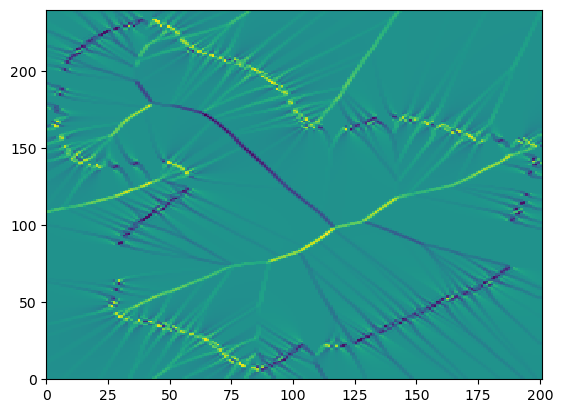

In [44]:
plt.pcolormesh(np.gradient(np.gradient(dist_transform))[1][1])

In [46]:
np.where(np.gradient(np.gradient(dist_transform))[0][0] == 0)

(array([  1,   1,   1, ..., 238, 238, 238]),
 array([ 55,  64,  65, ..., 128, 129, 130]))

In [32]:
np.min(np.linalg.norm(np.gradient(dist_transform), axis = 0))

0.0

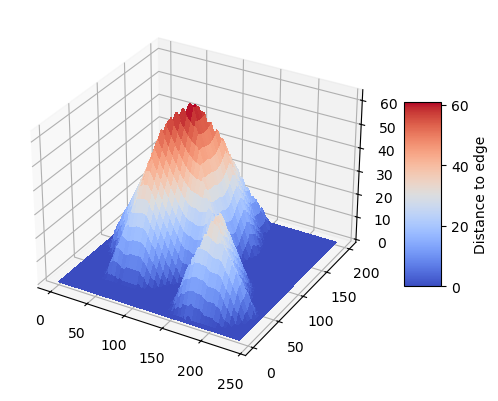

In [80]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, img.shape[1], 1)
Y = np.arange(0, img.shape[0], 1)
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = (dist_transform)

# Plot the surface.
surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, label='Distance to edge')
# fig.zlabel('Distance to edge')

plt.show()

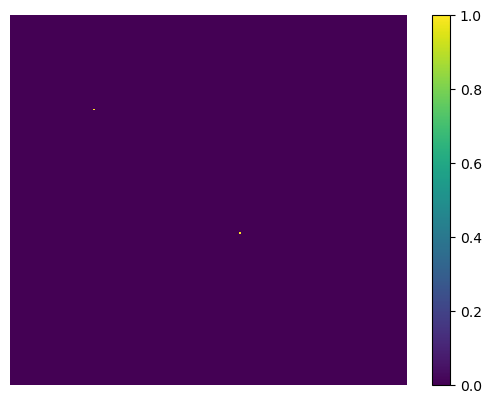

In [109]:
import scipy as sp
maxima =(dist_transform == sp.ndimage.maximum_filter(dist_transform, size=100, mode='constant', cval=0.0))
res = np.where(1==maxima)
for n in range(dist_transform.shape[0]):
    for m in range(dist_transform.shape[1]):
        if img[n, m]!=1:
            maxima[n, m] = 0

plt.pcolormesh(maxima)
plt.axis('off')
plt.colorbar()